<a href="https://colab.research.google.com/github/UtkarshGupta12/Fraud-Detection/blob/master/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/UtkarshGupta12/Fraud-Detection/master/Credit_Card_Applications.csv')

In [125]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [0]:
X = df.iloc[:, :-1].values

In [0]:
y = df.iloc[:,-1].values

In [128]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [129]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [131]:
!pip install minisom

In [0]:
from minisom import MiniSom 

In [0]:
som = MiniSom(x = 10 , y = 10 , input_len = 15 , sigma = 1.0 ,learning_rate = 0.5 )

In [0]:
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)

In [0]:
from pylab import bone , pcolor , colorbar , plot , show

In [136]:
bone()

<Figure size 432x288 with 0 Axes>

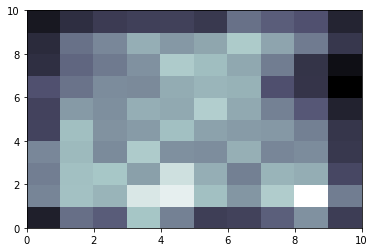

In [137]:
bone()
pcolor(som.distance_map().T)

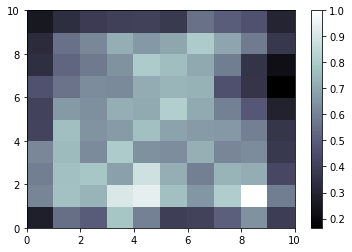

In [138]:
bone()
pcolor(som.distance_map().T)
colorbar()

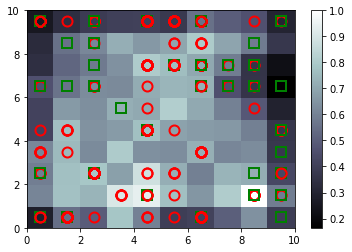

In [139]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [0]:
mappings = som.win_map(X)

In [0]:
frauds = mappings[(8,1)]

In [145]:
frauds

[array([0.88304923, 0.        , 0.08150376, 0.02089286, 0.        ,
        0.38461538, 0.375     , 0.02052632, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.08      , 0.        ]),
 array([0.0989873 , 0.        , 0.16917293, 0.03125   , 0.5       ,
        1.        , 0.875     , 0.03649123, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.08      , 0.0586    ]),
 array([0.80745128, 0.        , 0.54255639, 0.48517857, 0.5       ,
        0.23076923, 0.875     , 0.29824561, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.        ]),
 array([0.00850922, 0.        , 0.22300752, 0.12642857, 0.5       ,
        0.15384615, 0.5       , 0.01754386, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.0855    , 0.        ]),
 array([4.21657076e-01, 0.00000000e+00, 1.74135338e-01, 7.44642857e-02,
        5.00000000e-01, 5.38461538e-01, 8.75000000e-01, 9.64912281e-02,
        1.00000000e+00, 0.000000

In [0]:
frauds = sc.inverse_transform(frauds)

In [147]:
frauds

array([[1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5590434e+07, 0.0000000e+00, 2.5000000e+01, 8.7500000e-01,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 1.0400000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 5.8610000e+03],
       [1.5767358e+07, 0.0000000e+00, 4.9830000e+01, 1.3585000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5567839e+07, 0.0000000e+00, 2.8580000e+01, 3.5400000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 5.0000000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [148]:
for line in frauds:
    print(*line)

15786237.0 0.0 19.17 0.585 1.0 6.0 4.0 0.585 1.0 0.0 0.0 1.0 2.0 160.0 1.0
15590434.0 0.0 25.0 0.875 2.0 14.000000000000002 8.0 1.04 1.0 0.0 0.0 1.0 2.0 160.0 5861.0
15767358.0 0.0 49.83 13.585 2.0 4.0 8.0 8.5 1.0 0.0 0.0 1.0 2.0 0.0 1.0
15567839.0 0.0 28.58 3.54 2.0 3.0 5.0 0.5 1.0 0.0 0.0 1.0 2.0 171.0 1.0
15671014.0 0.0 25.33 2.085 2.0 8.0 8.0 2.75 1.0 0.0 0.0 1.0 2.0 360.0 2.0
15642336.0 0.0 57.08 0.335 2.0 3.0 5.0 1.0 1.0 0.0 0.0 1.0 2.0 252.0 2198.0
15740487.0 0.0 49.0 1.5 2.0 5.0 3.0 0.0 1.0 0.0 0.0 1.0 2.0 100.0 28.0
15593345.0 0.0 38.58 5.0 2.0 13.0 4.0 13.5 1.0 0.0 0.0 1.0 2.0 980.0 1.0
15811742.0 0.0 36.75 5.125 2.0 9.999999999999998 4.0 5.0 1.0 0.0 0.0 1.0 2.0 0.0 4001.0
15702571.0 0.0 22.5 11.0 1.0 11.0 4.0 3.0 1.0 0.0 0.0 1.0 2.0 268.0 1.0
15622083.0 0.0 17.58 9.0 2.0 6.0 4.0 1.375 1.0 0.0 0.0 1.0 2.0 0.0 1.0
15646190.0 0.0 60.58 16.5 2.0 11.0 4.0 11.0 1.0 0.0 0.0 1.0 2.0 21.0 10562.0
15715907.0 0.0 31.57 3.5 2.0 2.0 4.0 3.0 1.0 0.0 0.0 1.0 2.0 300.0 1.0
15768342.0 0.0 41